In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
import copy

In [2]:
def loop_grid(matrix, mkd, a):
    
    transpot = np.ones((50, 50))
    
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            for k in range(i-3, i+4):
                for l in range(j-3, j+4):
                    if k < 0 or k > 49 or l < 0 or l > 49:
                        continue
                    else:
                        if matrix[k, l] == 1 and (k, l) != (i, j):
                            transpot[i, j] += mkd[abs(i - k) + abs(l - j) - 1]
                            
    for i in range(len(transpot)):
        for j in range(len(transpot[0])):
            S = 1 + (-np.log(random.random()))**(a)
            transpot[i, j] *= S
                            
    return transpot
                

[1381  830 1153 2478 1376 1511 2200 2141  795 1230 2268  326 2456   84
 1438 1303 2474 1987  384 2330 2170 1992 1323 1447  293  337  114  290
  892 2354 2327 1842  267 1222 2234 2084  597  822 1787  150  452   88
  537 1312  826 1163  378 1219 1594 2135 1666  664  153  864  850 1881
  763  192 1791  251 1413 1089 1889  706 1563 1694 2429 1143 1984 1124
  394 1111  861 1353  179  828 2077 2307 2422 2246  301  149 2316   96
  261 1625 1224 1779  717  410  381 2023 1661  411 1318  741 1025 1315
  282  708 1668 2369  671 1763 1976 1665 1462 1990  190  406 2081 1864
 1008  752  728  490  882 1933 2031   29 1367 1972  580  743 1657]
[2188  794 1765  241 2288 2355 1152 1214  894  546  679 2032  331 1478
  713  309  252  362 1404 2428 1320 1878   47  388  353 1962 1830 1989
 1122 1076 1504 1465 2405 1844 2269  491 1734  251 2035  876  236 2180
  364 1718 1869 1730 1564  380 1175 1732 1814 1641 1610 2423  186 1695
  746 2479 2081  232 1845 1939  801 1975  855 2287  213 1253 1078 2229
  384 1364

[ 695  923 2271  240 1983 1966 2181  624  344 2034 1276  150  380  265
 1370 2220 1443 1211 2137 1564  196 1880   92 2079 2091  243  889 1214
 1078 1679 2329 2023 2428  410  478 2225 1487 1323 1036  180 2028   94
 1732 1543 1377 2089  343 1711 1572 1409 1261 1465 2479  832  366 1029
 1105 1328 1050 2478 1661  283 1227  185  696 2174  916 2240 1561  631
 1485 1212 2170  195 1152  704  304 1508  144 2334  316  531 1150 1455
  730  342 2305 2074  287   67  381  768 1985  961  977 1382 1406 1673
 2377  646 1463 1361 2027 1793 1282 1855 2189 1883  518 1714 1636  201
 1977  462 1843  278  870 1638  732 2282 1153  756 1138  937  486]
[1834 1913  798 1830  647 1475 1809 1967 2134  921  187  641 1325 1582
 2454  532 2087 2180 1872 1618 1673  129 1866 1739 1816  337  775 1985
 2324  184 2468 1734 1563 1613 1478 1930  761 2123 1327 2039 2304  881
  762 1914 1839 1721  987  333 1427  636  745 1880 1876  232 1788  429
   92 1837 2344  294 2040 2121 1761 1933 1130 2360  949 1964 2279 1989
  894  781

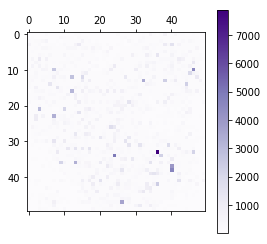

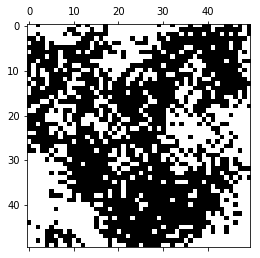

In [8]:
width = 50
height = 50

city = np.zeros((width, height))

steps = 20

city[25, 25] = 1

Nh = 0.05
a = 2.5
mkd = [2, 2, 1.5, 1.5, 1, 1, 1]

for step in range(steps):
    trans1 = loop_grid(city, mkd, a)
#     print(trans1)

    newhouses = trans1.flatten().argsort()[-int((width*height)*Nh):][::-1]
    
    print(newhouses)

    for house in newhouses:
        city[house//width, house%height] = 1

plt.matshow(trans1, cmap = 'Purples')
plt.colorbar()

plt.matshow(city, vmin = 0, vmax = 1, cmap = 'Greys')
plt.show()